In [3]:
import numpy as np

from sklearn import preprocessing,cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score

from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#Loading the data set
url='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
names=['id','clump_thickness','uniform_cell_size','uniform_cell_shape',
      'marginal_adhesion','signle_epithelial_size','bare_nuclei',
      'bland Chromatin','normal_nucleoli','Mitoses','class']
df=pd.read_csv(url,names=names)


In [10]:
#preprocess the data
df.replace('?',-99999,inplace=True)
print(df.axes)  #print data axes
df.drop(['id'],1,inplace=True)
print(df.shape)  #print data shape


[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
       'bland Chromatin', 'normal_nucleoli', 'Mitoses', 'class'],
      dtype='object')]
(699, 10)


In [15]:
#data visualization 
print(df.loc[0])
print(df.describe())

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
signle_epithelial_size    2
bare_nuclei               1
bland Chromatin           3
normal_nucleoli           1
Mitoses                   1
class                     2
Name: 0, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  signle_epithelial_size  bland Chromatin  \
count         699.000000              699.

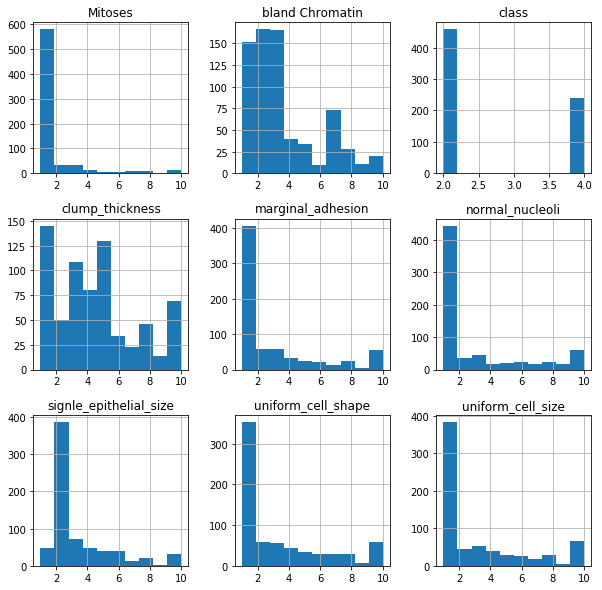

In [20]:
#plot histogram for each variable
df.hist(figsize=(10,10))
plt.show()

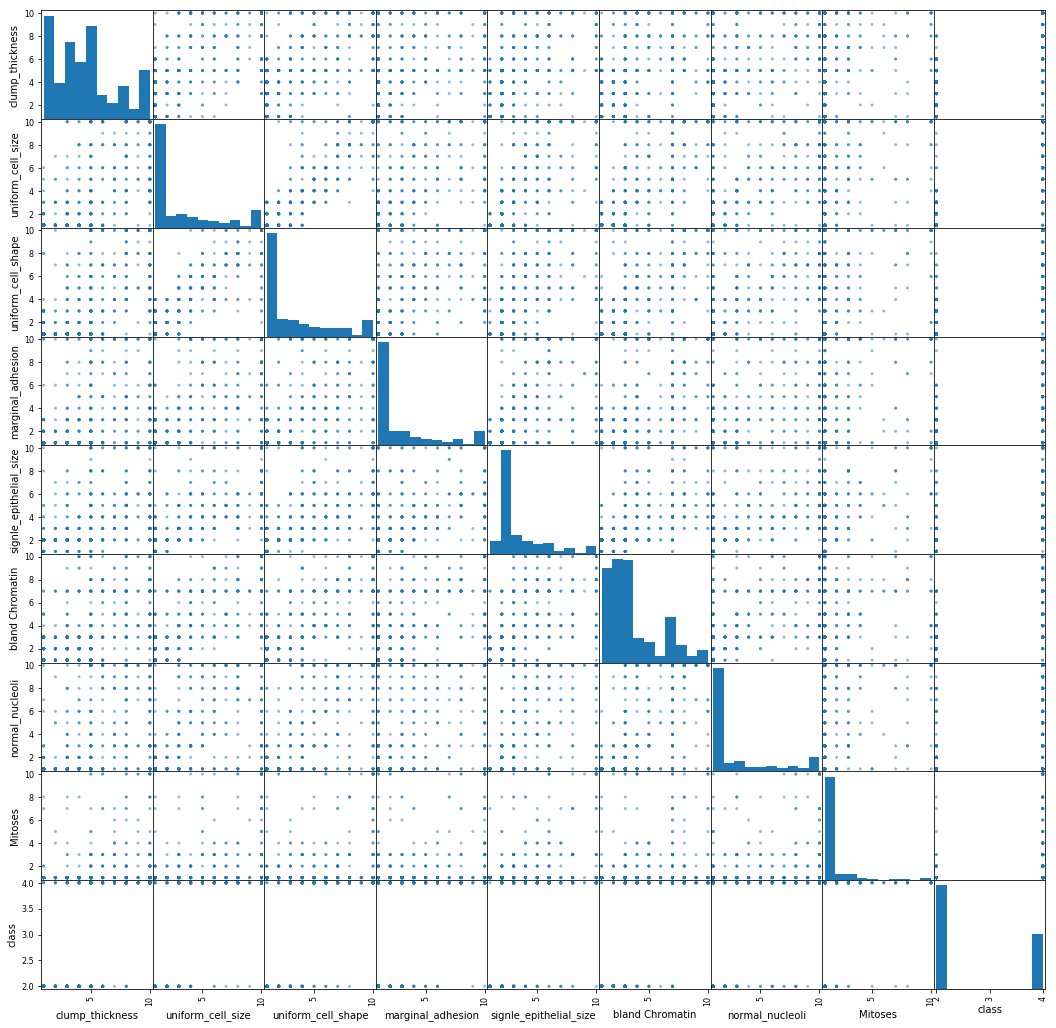

In [24]:
#scatter plot matrix
scatter_matrix(df,figsize=(18,18))
plt.show()

In [28]:
#create x and y data
x=np.array(df.drop(['class'],1))
y=np.array(df['class'])

x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.2)


In [35]:
#specifiy testing option 
seed=8
scoring='accuracy'


In [38]:
#define the model o train
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

#evaluate each model 
results=[]
names=[]

for name,model in models :
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(names)
    
    msg="%s %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

KNN 0.971331 (0.016517)
SVM 0.960617 (0.028622)


In [41]:
# make prediction 
for name,model in models:
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.95
             precision    recall  f1-score   support

          2       0.96      0.97      0.96        95
          4       0.93      0.91      0.92        45

avg / total       0.95      0.95      0.95       140

SVM
0.9428571428571428
             precision    recall  f1-score   support

          2       0.99      0.93      0.96        95
          4       0.86      0.98      0.92        45

avg / total       0.95      0.94      0.94       140

